## Delivery_time => Predict delivery time using sorting time

##### x – single & continuous (independent) => sorting time

##### y – continuous (dependent) => delivery time

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from pickle import dump
from pickle import load

## 2. Importing dataset

In [2]:
dt_st = pd.read_csv('delivery_time.csv')
dt_st

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3. Initial Data Analysis

In [3]:
dt_st.shape   # To get the total no. of rows and columns

(21, 2)

In [4]:
dt_st.isna().sum()   # To check for null values

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
dt_st.dtypes  # To get the datatypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
dt_st.head(6)   # To get the data of first 6 columns to check for any discrepancy

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6


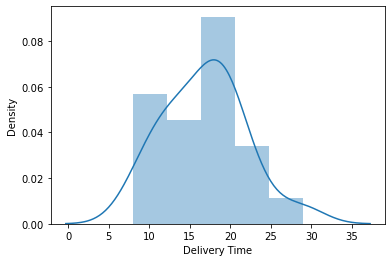

In [7]:
sns.distplot(dt_st['Delivery Time'])      # Distplot for Delivery Time
plt.xlabel('Delivery Time')
plt.show()

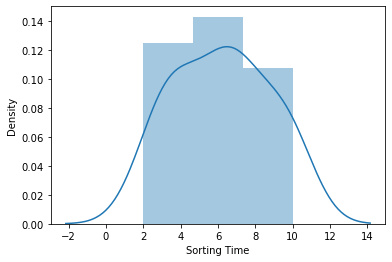

In [8]:
sns.distplot(dt_st['Sorting Time'])        # Distplot for Sorting Time
plt.xlabel('Sorting Time')
plt.show()

## 4. Feature Engineering

In [9]:
dt_st = dt_st.rename(columns = {'Delivery Time' : 'dt', 'Sorting Time' : 'st'})  # To give a simpler name to the columns
dt_st

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 5. Assumption check by Data Visualization

#### 1. Check for linearity

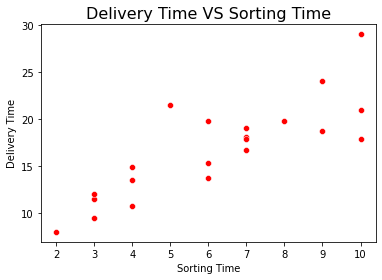

In [10]:
sns.scatterplot(x = dt_st['st'] , y = dt_st['dt'] , color = 'red')   # Scatter plot
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Delivery Time VS Sorting Time', size = 16)
plt.show()

**Correlation Analysis**

In [11]:
dt_st.corr()   # Strong correlation

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


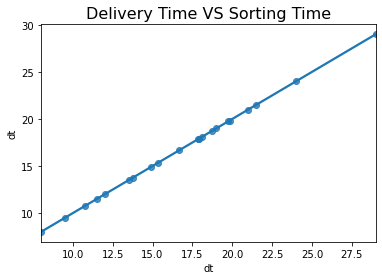

In [12]:
sns.regplot(x = dt_st['dt'] , y = dt_st['dt'])               # Reg plot
plt.title('Delivery Time VS Sorting Time', size = 16)
plt.show()

#### 2. Homoscedasticity - It can be checked post model building and training

#### 3. No Multicollinearity - By using Correlation Matrix

In [13]:
corr_matrix = dt_st.corr().round(2)
corr_matrix

,dt,st
dt,1.00,0.83
st,0.83,1.00


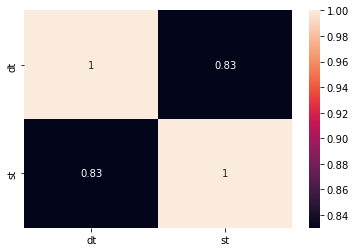

In [14]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

#### 4. Autoregression (or) Autocorrelation - Positive correlation

#### 5. Zero residual mean - It can be checked post model building and training

## 6. Model Building | Model Training

In [15]:
linear_reg_model = smf.ols("dt~st", data = dt_st).fit()
linear_reg_model

**NOTE: With statsmodels model building and training is happening at the same time**

## 7. Model Testing

In [16]:
linear_reg_model.params         # Finding Coefficient parameters

Intercept    6.582734
st           1.649020
dtype: float64

In [17]:
linear_reg_model.tvalues       # t_values

Intercept    3.823349
st           6.387447
dtype: float64

In [18]:
linear_reg_model.pvalues       # p_values => To know whether the input parameter is significant or not. 
# pvalue of t-test for st < 0.05, so there is a good relationship between the input and the output variable.

Intercept    0.001147
st           0.000004
dtype: float64

In [22]:
df = pd.DataFrame(dt_st)
df

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


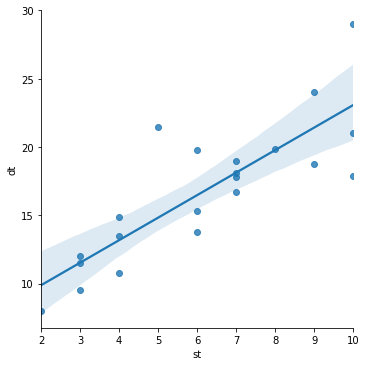

In [29]:
sns.lmplot(x= 'st', y= 'dt', data = dt_st)
plt.show()  
# Homoscedasticity condition satisfied i.e. few of the datapoints lie near the regression line and have constant variance

In [21]:
linear_reg_model.resid.mean    # Zero Residual mean 

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64>

In [19]:
print('R-Squared Value          : ',round(linear_reg_model.rsquared,3))
print('Adjusted R-Squared value : ',round(linear_reg_model.rsquared_adj,3))      
# Finding Rsquared Values
# Adj. R-squared value < R-squared value, it’s a sign that we have irrelevant predictors in the model.

R-Squared Value          :  0.682
Adjusted R-Squared value :  0.666


In [20]:
linear_reg_model.summary()    # Summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        14:37:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8. Model Predicition

In [23]:
deliver_time = (6.582734) + (1.649020)*(5)        # Manual prediction for say sorting time 5
deliver_time

14.827834

In [24]:
new_data = pd.Series([6,8])                   # Automatic Prediction for say sorting time 6, 8
new_data

0    6
1    8
dtype: int64

In [25]:
data_pred = pd.DataFrame(new_data,columns=['st'])
data_pred

,st
0,6
1,8


In [26]:
linear_reg_model.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

## 9. Model Deployment 

In [27]:
dump(linear_reg_model,open('linear_regression.pkl','wb'))
tested_linear_model = load(open('linear_regression.pkl','rb'))
tested_linear_model.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**